**CAR PRICE PREDICTION**

**Objective**


> The objective of a car price prediction project using linear regression machine learning is to develop a model that can accurately predict the price of a car based on various input features. This model can be useful for car buyers, sellers, and dealerships in estimating the value of a vehicle.



Data Source


> There are 9 variable used in dataset which was imported from YBI github page
#(https://github.com/YBI-Foundation/Dataset/raw/main/Car%20Price.csv)


*   Brand
*   Model

*   Selling price
*   KM_Driven

*   Fuel
*   Seller_Type


*   Transmission
*   Owner











**Import Library**

In [ ]:
import pandas as pd
import numpy as np

**Import Dataframe**

In [ ]:
df = pd.read_csv(r'https://github.com/YBI-Foundation/Dataset/raw/main/Car%20Price.csv')


**Describing Data**

First five rows

In [ ]:
df.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


Information of dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4340 non-null   object
 1   Model          4340 non-null   object
 2   Year           4340 non-null   int64 
 3   Selling_Price  4340 non-null   int64 
 4   KM_Driven      4340 non-null   int64 
 5   Fuel           4340 non-null   object
 6   Seller_Type    4340 non-null   object
 7   Transmission   4340 non-null   object
 8   Owner          4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


Summary of Statistics

In [ ]:
df.describe()


,Year,Selling_Price,KM_Driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


Categories and counts of categorical variables

In [ ]:
df[['Brand']].value_counts()

Brand        
Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Mitsubishi          6
Jaguar              6
Land                5
Ambassador          4
Volvo               4
Jeep                3
OpelCorsa           2
MG                  2
Isuzu               1
Force               1
Daewoo              1
Kia                 1
dtype: int64

In [ ]:
df[['Model']].value_counts()

Model                               
Maruti Swift Dzire VDI                  69
Maruti Alto 800 LXI                     59
Maruti Alto LXi                         47
Hyundai EON Era Plus                    35
Maruti Alto LX                          35
                                        ..
Mahindra KUV 100 G80 K4 Plus             1
Mahindra KUV 100 mFALCON D75 K8          1
Mahindra KUV 100 mFALCON D75 K8 AW       1
Mahindra KUV 100 mFALCON G80 K2 Plus     1
Volvo XC60 D5 Inscription                1
Length: 1491, dtype: int64

In [ ]:
df[['Fuel']].value_counts()

Fuel    
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
dtype: int64

In [ ]:
df[['Seller_Type']].value_counts()

Seller_Type     
Individual          3244
Dealer               994
Trustmark Dealer     102
dtype: int64

In [ ]:
df[['Transmission']].value_counts()

Transmission
Manual          3892
Automatic        448
dtype: int64

In [ ]:
df[['Owner']].value_counts()

Owner               
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
dtype: int64

Columns names

In [ ]:
df.columns

Index(['Brand', 'Model', 'Year', 'Selling_Price', 'KM_Driven', 'Fuel',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

Shape of dataframe

In [ ]:
df.shape

(4340, 9)

Get encoding of categorical features

In [ ]:
df.replace({'Fuel':{'Petrol':0, 'Diesel':1,'CNG':2,'LPG':3,'Electric':4}}, inplace=True)
df.replace({'Seller_Type':{'Individual':0, 'Dealer':1,'Trustmark Dealer':2,}}, inplace=True)
df.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)
df.replace({'Owner':{'First Owner':0, 'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}}, inplace=True)


**Define Y (dependent or label or target variable) and X (independent or feature or attribute variable)**

In [ ]:
y = df['Selling_Price']
y.shape

(4340,)

In [ ]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: Selling_Price, Length: 4340, dtype: int64

In [ ]:
X = df[['Year', 'KM_Driven', 'Fuel','Seller_Type', 'Transmission', 'Owner']]

In [ ]:
X.shape


(4340, 6)

In [ ]:
X

,Year,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,2007,70000,0,0,0,0
1,2007,50000,0,0,0,0
2,2012,100000,1,0,0,0
3,2017,46000,0,0,0,0
4,2014,141000,1,0,0,1
...,...,...,...,...,...,...
4335,2014,80000,1,0,0,1
4336,2014,80000,1,0,0,1
4337,2009,83000,0,0,0,1
4338,2016,90000,1,0,0,0


**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2529)


In [ ]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((3038, 6), (1302, 6), (3038,), (1302,))

Modeling

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
lr = LinearRegression()


In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

Get Model Prediction

In [ ]:
y_pred = lr.predict(X_test)
y_pred.shape

(1302,)

In [ ]:
y_pred

array([502458.82786413, 646333.17428704, 521962.74075836, ...,
       620183.32683781, 315403.8278857 , 731862.54196037])

**Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
mean_squared_error(y_test, y_pred)

193242972302.19553

In [ ]:
mean_absolute_error(y_test, y_pred)

228808.9552297788

In [ ]:
r2_score(y_test, y_pred)

0.4075563394370839

R square is very low signify need for model improvement
Encourage viewers to find probable reasons for model poor performance

**Data visualization of actual vs predicted results**

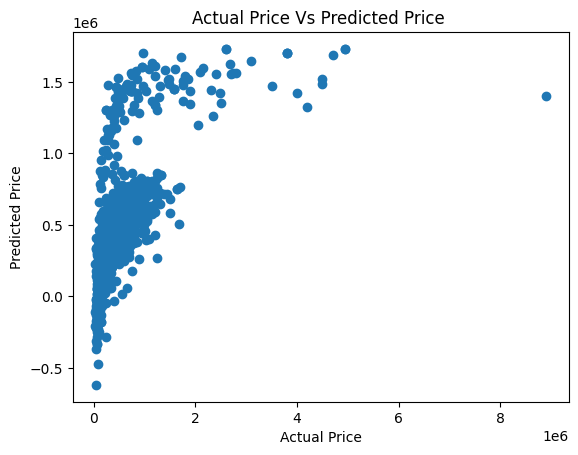

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price Vs Predicted Price ")
plt.show()

Get Future predictions

In [ ]:
df_new = df.sample(1)
df_new

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
1423,Hyundai,Hyundai i10 Magna 1.2 iTech SE,2011,235000,74500,0,0,0,1


In [ ]:
df_new.shape

(1, 9)

In [ ]:
X_new = df_new.drop(['Brand', 'Model','Selling_Price'], axis =1 )

In [ ]:
y_pred_new = lr.predict(X_new)
y_pred_new

array([176080.04160832])

**Explanation**

**Importing necessary libraries:**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
Here, we import the required libraries for data manipulation, visualization, model training, and evaluation.

**Importing the DataFrame:**
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Car%20Price.csv')
This code imports the car price dataset from a CSV file hosted on GitHub and stores it in a pandas DataFrame called df.

**Encoding categorical variables:**
df_encoded = pd.get_dummies(df, columns=['Fuel', 'Seller_Type', 'Transmission', 'Owner'], drop_first=True)
The pd.get_dummies() function is used to perform one-hot encoding on categorical variables. It creates dummy variables for each category and drops the first category to avoid multicollinearity issues. The encoded DataFrame is stored in df_encoded.

**Defining the dependent and independent variables:**
y = df_encoded['Selling_Price']
X = df_encoded[['Year', 'KM_Driven', 'Fuel_Diesel', 'Fuel_Electric', 'Fuel_LPG', 'Fuel_Petrol',
                'Seller_Type_Individual', 'Seller_Type_Trustmark Dealer', 'Transmission_Manual',
                'Owner_Fourth & Above Owner', 'Owner_Second Owner', 'Owner_Test Drive Car',
                'Owner_Third Owner']]
The dependent variable y is defined as the 'Selling_Price' column from df_encoded. The independent variables X are selected columns from df_encoded that will be used to predict the selling price.

**Train-test split:**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2529)
The train_test_split() function is used to split the dataset into training and testing sets. The independent variables X and dependent variable y are split into X_train, X_test, y_train, and y_test, with a test size of 30% and a random state of 2529 for reproducibility.

**Model training:**
lr = LinearRegression()
lr.fit(X_train, y_train)
A linear regression model is created using the LinearRegression() class from scikit-learn. The model is trained on the training data using the fit() method.

**Model prediction:**
y_pred = lr.predict(X_test.values)
The trained linear regression model is used to make predictions on the test set by calling the predict() method on X_test.values. The predicted values are stored in y_pred.

**Model evaluation:**
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
Various metrics are calculated to evaluate the performance of the model. Mean squared error (MSE), mean absolute error (MAE), and R-squared score (R2) are computed using the corresponding functions from scikit-learn.

**Visualization of actual vs predicted results:**
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price Vs Predicted Price")
plt.show()
A scatter plot is created to visualize the relationship between the actual selling prices (y_test) and the predicted selling prices (y_pred).

**Future predictions:**
df_new = df.sample(1)
X_new = pd.get_dummies(df_new, columns=['Fuel', 'Seller_Type', 'Transmission', 'Owner'], drop_first=True)
y_pred_new = lr.predict(X_new[X.columns].values)
A random sample of one row is taken from the original DataFrame df using the sample() method, and it is stored in df_new. The categorical variables in df_new are one-hot encoded using pd.get_dummies() and stored in X_new. Finally, the linear regression model (lr) is used to predict the selling price (y_pred_new) for the new data in X_new by providing only the relevant columns from X using X_new[X.columns].values.

Hence this is the detailed explanation of the code. It imports the data, encodes categorical variables, trains a linear regression model, evaluates its performance, visualizes the results, and makes predictions for new data.